# Lecure 7.2 Even more data analysis with pandas

Lots more coding today, with a bit of discussion.

Homework is to do some analysis of the movies dataset and present your results on Tuesday

# 1. Warm-up

Learning objectives: modifying plots by looking at the documentation and examples, pandas mastery

For this exercise we are using the durations data TED Talk database from last time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

### 1.1 
Create the pandas film_datetime column used previously. Save the resulting pandas dataframe as a new file with a different name. Load this new file into pandas to check that your new column is there.

In [4]:
# first load in the dataset (see Lecutre 5.2)
ted = pd.read_csv('../ted.txt') # the ../ goes up one directory (at least on macs)

In [5]:
ted['film_datetime']= pd.to_datetime(ted.film_date, unit = 's')

In [8]:
# write to file
ted.to_csv('../ted2.txt')

In [9]:
# load the new file

ted2 = pd.read_csv('../ted2.txt')


In [11]:
# check if the new variable column is in there:
ted2.dtypes

Unnamed: 0             int64
comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
film_datetime         object
dtype: object

### 1.2
Sort the data by month and make a histogram of the number of talks in a given month. Note that the default of 10 bins does not work well for this. How well does using 12 bins work?

In [43]:
# sort by month
ted.film_datetime.dt.month.value_counts().sort_index()

1      33
2     601
3     397
4     173
5     123
6     270
7     253
8      30
9     107
10    208
11    232
12    123
Name: film_datetime, dtype: int64

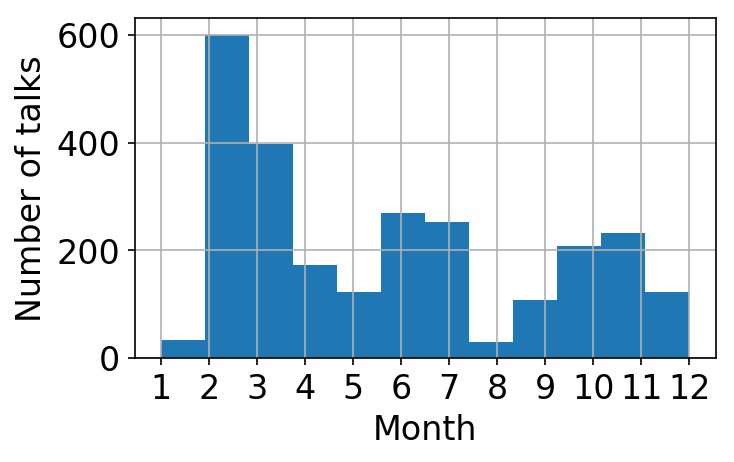

In [13]:
# plot by number of months
ted.film_datetime.dt.month.hist(bins = 12) # note here I am defining the bin edges, see
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
plt.xlabel('Month')
plt.ylabel('Number of talks')
plt.xticks(np.arange(1,13));

The above does not work well, they do not align by month

### 1.3
Look at the documentation for plotting histograms (google it). Define an array that will give the bins you need to make a bin for each month with sensible endpoints, using one of the numpy functions we discussed previously. What should your bin edges be? 

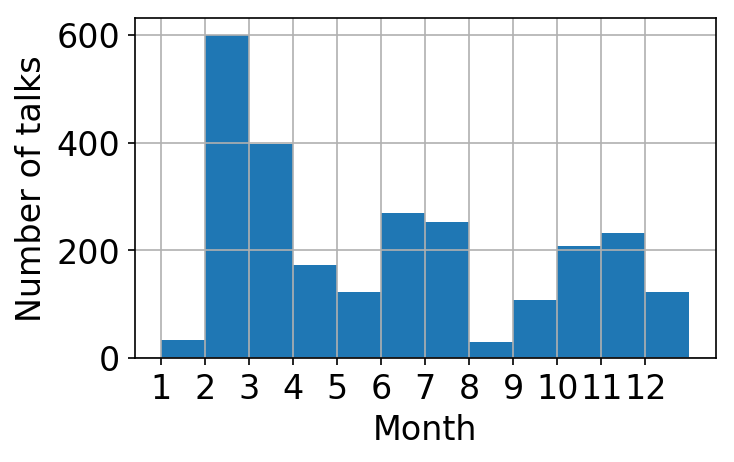

In [29]:
# plot by number of months
ted.film_datetime.dt.month.hist(bins = np.arange(1,14)) # note here I am defining the bin edges, 
# which end at 13, thus the 14, see
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
plt.xlabel('Month')
plt.ylabel('Number of talks')
plt.xticks(np.arange(1,13)); # make the ticks. Note these ideally would be in the middle of the bins

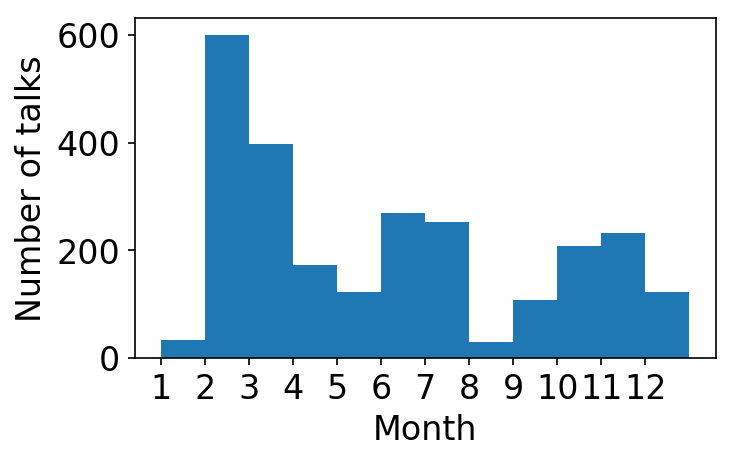

In [36]:
# note you can also pass a pandas variable to matplotlib
plt.hist(ted.film_datetime.dt.month,bins = np.arange(1,14) )
# note here I am defining the bin edges, 
# which end at 13, thus the 14, see
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
plt.xlabel('Month')
plt.ylabel('Number of talks')
plt.xticks(np.arange(1,13)); # make the ticks. Note these ideally would be in the middle of the bins

### 1.4
Label your x-axis with month labels 

In [19]:
months = ['J','F','M','A','M','J','J','A','S','O','N','D']

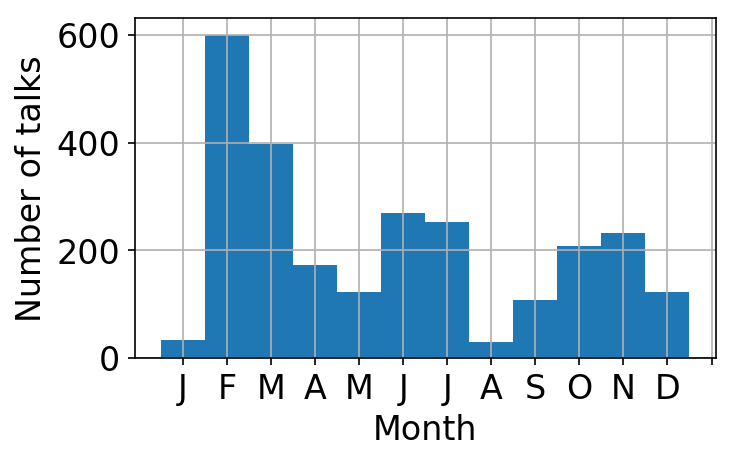

In [31]:
# plot by number of months
ted.film_datetime.dt.month.hist(bins = np.arange(1,14)) # note here I am defining the bin edges, see
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
plt.xlabel('Month')
plt.ylabel('Number of talks')
plt.xticks(np.arange(1.5,14.5), labels = months); # moving the ticks to the middle of the bins


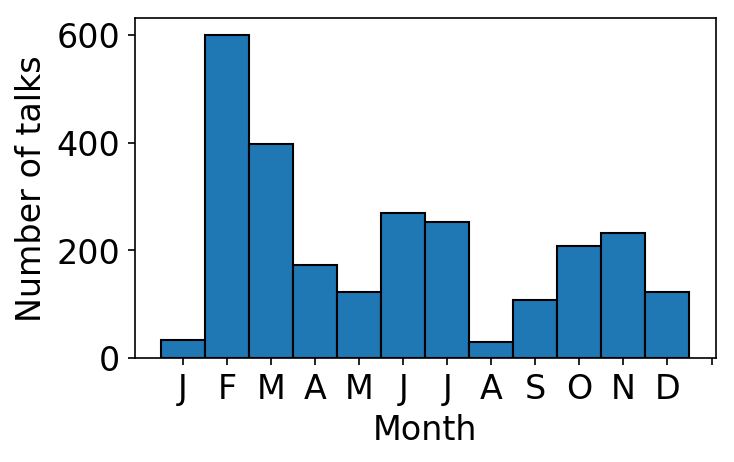

In [42]:
# alternately, to gain more control:

# note you can also pass a pandas variable to matplotlib
plt.hist(ted.film_datetime.dt.month,bins = np.arange(1,14), edgecolor = 'k' )
# note here I am defining the bin edges, 
# which end at 13, thus the 14, see
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
plt.xlabel('Month')
plt.ylabel('Number of talks')
plt.xticks(np.arange(1.5,14.5), labels = months); # moving the ticks to the middle of the bins


# 2. Discussion

## 2.1 Seminar homework from last week
Some potential questions for discussion:
- What makes a good talk? 
- Does the rubric capture what makes a good talk?
- How were the figures in the talk formatted?
- How was this different than the figures in the paper?

## 2.2 Pandas analysis by students

Moving this to Tuesday

# 3. Exercises

Learning objectives: pandas mastery, writing data files with pandas, data analysis: asking research questions, doing the analysis, and presenting your results

### 3.1 
From the movies spreadsheet you used last week (Lec 6.2), make a histogram of all the years movies were made, combining the data in three sheets. In one plot, make two subplots, one with bins (bars) of 10 years width, and one with bins of 20 years width. Note this does not mean 10 and 20 bins!


In [51]:
file = '../Data/movies.xls'

In [52]:
# get all the sheets into one pandas dataframe
xlsx = pd.ExcelFile(file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
movies2 = pd.concat(movies_sheets)

In [50]:
movies2.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


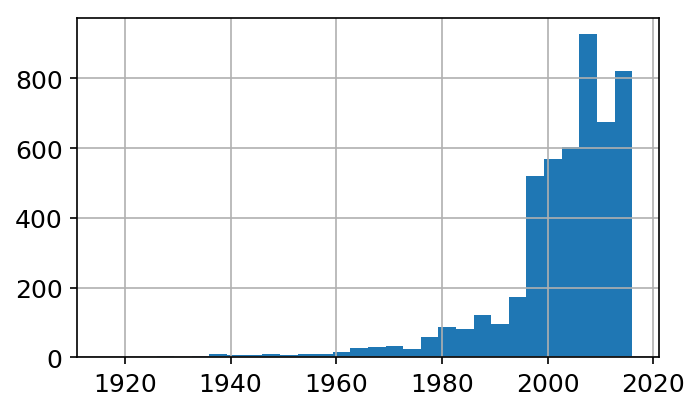

In [88]:
# quick plot
movies2.Year.hist(bins = 30)

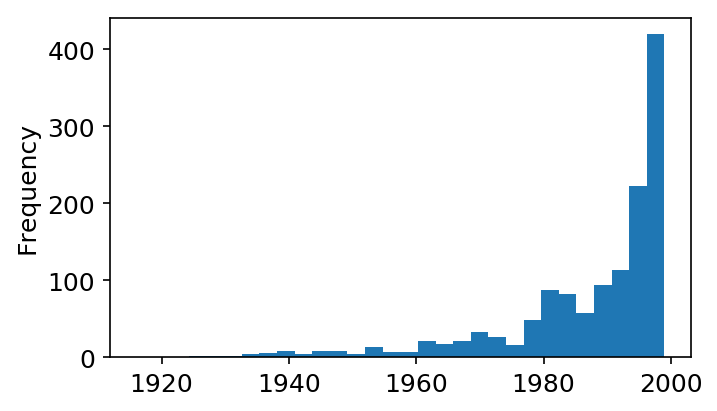

In [89]:
# I like this one better without the grid
movies['Year'].plot(kind='hist', bins = 30)

In [92]:
# make some sensible bins
np.arange(1900,2030,10)

array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
       2010, 2020])

(array([  2.,   6.,  18.,  20.,  24.,  46.,  81., 151., 234., 756.]),
 array([1916. , 1924.3, 1932.6, 1940.9, 1949.2, 1957.5, 1965.8, 1974.1,
        1982.4, 1990.7, 1999. ]),
 <a list of 10 Patch objects>)

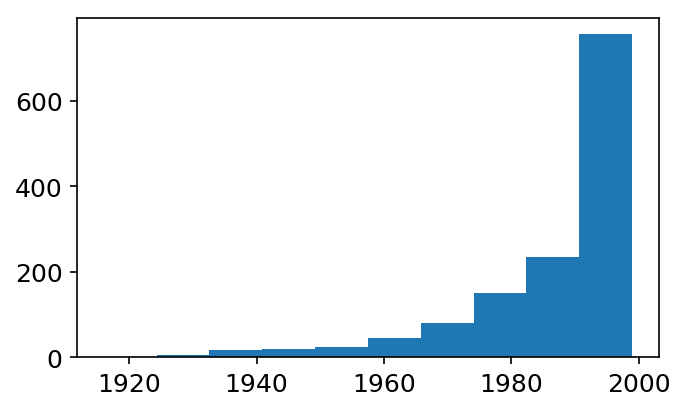

In [98]:
plt.hist(movies.Year)

Text(0.5, 0, 'Years')

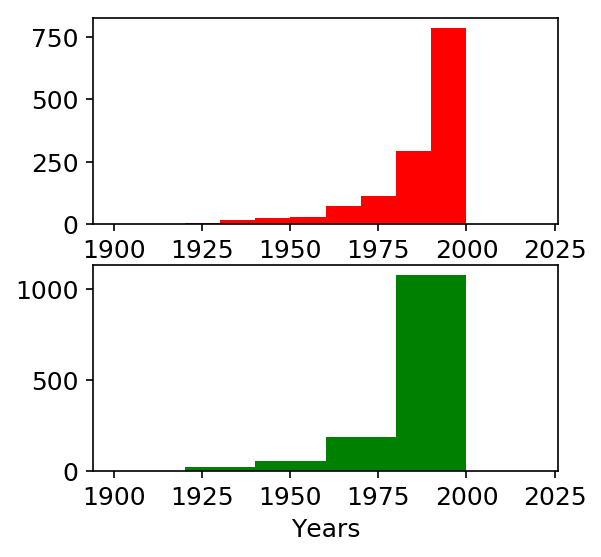

In [108]:
plt.figure(figsize = [4,4])
plt.subplot(2,1,1)
plt.hist(movies.Year, bins = np.arange(1900,2030,10), facecolor = 'r')

plt.subplot(2,1,2)
plt.hist(movies.Year, bins = np.arange(1900,2030,20), facecolor = 'g')
plt.xlabel('Years')

### 3.2
Label your axes and change the color of the bars in each plot. Make the bars have black outlines.

Text(0.5, 0, 'Years')

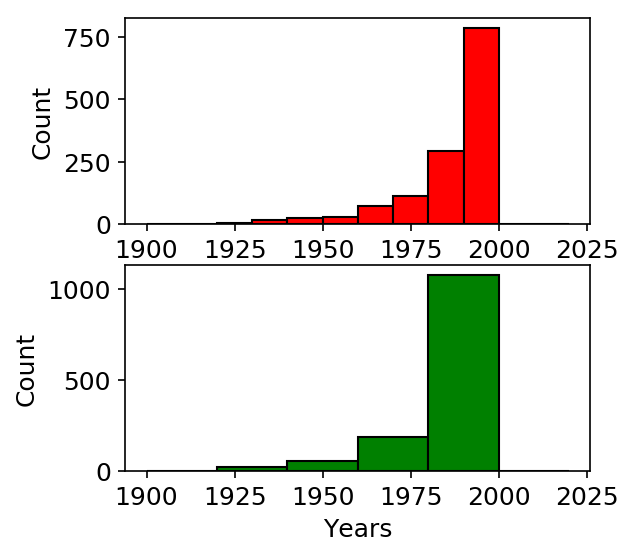

In [110]:
plt.figure(figsize = [4,4])
plt.subplot(2,1,1)
plt.hist(movies.Year, bins = np.arange(1900,2030,10), facecolor = 'r', edgecolor = 'k')
plt.ylabel('Count')

plt.subplot(2,1,2)
plt.hist(movies.Year, bins = np.arange(1900,2030,20), facecolor = 'g', edgecolor = 'k')
plt.ylabel('Count')
plt.xlabel('Years')

### 3.3
Interpret your results. How does changing the number of bins give you a different perspective on the data? Is the dropoff over time an artifact of the dataset or is it realistic?

The number of movies is increasing exponentially with time

### 3.4 
What is the lowest IMDB score?

### 3.5 
Find the names of all the movies with an IMDB score below 5, put these in a new pandas dataframe along with their IMDB scores. Write this dataframe to a new file. Check that your file works by loading it back in again.

### 3.6-9 (and homework)

Now get creative. Define three research questions for this movies data set and do analysis to answer those quesitons. You will present this analysis, along with your data analysis methods, to the class on Tuesday. Showing this analysis in a notebook is fine, but make sure your plots are formatted for presentation.